# 爬取评论

In [1]:
from Crypto.Cipher import AES
import base64
import codecs
import requests
import json
import unicodedata as unicode

In [6]:
url = 'https://music.163.com/weapi/v1/resource/comments/R_SO_4_1403215687?csrf_token=fcad0bf3639c82ae5079e7989f3956e8'

header = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36',
    'Referer': 'https://music.163.com/song?id=1403215687',
    'Origin': 'https://music.163.com',
    'Host': 'music.163.com'
}

In [7]:
# 设置代理服务器
proxies = {
            'http:': 'http://121.232.146.184',
            'https:': 'https://144.255.48.197'
        }

## 爬取一页评论 

In [9]:
# 爬取一页评论

user_data = {
   'params': '5hGhSzG8uPdBh4Y3ClImzkv4a6OoPeQTRnogLixCLk5LrufbnZrm8ihb331R4ypIMj7HO7ic0REAyflEBe5mClv1NMkGJH773Six9MFk/B3IZyJzAu5DhlQAWQviOOhRRHhOPgPR7zkBFkLpJMety8CDluXiAftaDzjWR684WvuhbI1Dzxd5oocdaE5vG5Fskfl7wOCJC/7ij3n7xicjUdsN1r2sdDVZLyNuFhykWcA=',
   'encSecKey': 'a1fbb50251db49225e1101d9679322aa9d56a4ff7fa75cd6dce464ac551465da65bf27f6534f840a82e865b65afcec96981710ec0eec8b6776a302b3b936911a253220b2b50808ed71d54b966950e386c0a5bd79cd8ace64250c59e457280c6ced5f3a1e5ef3e9a93af0632274f0c4afefdeb44fd2dc31965e7eda5631e5e913'
}

response = requests.post(url,headers=header,data=user_data)

In [14]:
response.text

'{"isMusician":false,"userId":-1,"topComments":[],"moreHot":true,"hotComments":[{"user":{"locationInfo":null,"liveInfo":null,"userId":1623686095,"remarkName":null,"vipType":0,"expertTags":null,"authStatus":0,"experts":null,"vipRights":null,"nickname":"ihtmoveon","userType":0,"avatarUrl":"https://p2.music.126.net/YBZb4A1H_eWo8Paf7dT5lQ==/109951164771998182.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":2042064989,"content":"是莫俊杰先喜欢的陈韵如，是莫俊杰在天台上默默倾听女孩的呐喊。莫俊杰是先来的那个人，但在李子维推开音像店门的那一刻，莫俊杰就出局了。李子维和王全胜喜欢的都是黄雨萱，只有莫俊杰喜欢着那个暗淡孤独的陈韵如。在青春的故事里，做旁观者和配角 是孤独而又苦涩的事。","time":1575798399903,"likedCount":197755,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"userId":1498565066,"remarkName":null,"vipType":11,"expertTags":null,"authStatus":0,"experts":null,"vipRights":{"associator":{"vipCode":100,"rights":true},"musicPackage":null,"redVipAnnualCount":-1},"nick

In [15]:
# rid 是歌曲的id标志 offset是控制翻页的标志
# first_param = b'{"rid":"", "offset":"0", "total":"true", "limit":"20", "csrf_token":""}'
second_param = '010001'
third_param = '00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa' \
              '76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee' \
              '255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7'
forth_param = b'0CoJUm6Qyw8W8jud'
# params 需要第一个和第四个参数 encSecKey需要一个随机的16位字符串和第二个和第三个参数
strw = 'S' * 16

In [16]:
def aesEncrypt(text, key):
    # 偏移量
    iv = b'0102030405060708'
    pad = 16 - len(text) % 16
    # print(type(text))
    tt = pad * chr(pad)
    text = text + tt.encode('utf-8')
    encrpyptor = AES.new(key, AES.MODE_CBC, iv)
    cipher_text = encrpyptor.encrypt(text)
    cipher_text = base64.b64encode(cipher_text)
    return cipher_text


In [17]:
def rsaEncrypt(pubkey, text, mouduls):
    text = text[::-1]
    rs = int(codecs.encode(text.encode('utf-8'), 'hex_codec'), 16) ** int(pubkey, 16) % int(mouduls, 16)
    rs = format(rs, 'x').zfill(256)
    print(rs)
    return rs


In [18]:
def get_params(text):
    if text == 1:
        first_param = b'{"rid":"", "offset":"0", "total":"true", "limit":"20", "csrf_token":""}'
        params = aesEncrypt(first_param, forth_param)
    else:
        offset = str((text-1)*20)
        first_param = b'{"rid":"", "offset":"%b", "total":"false", "limit":"20", "csrf_token":""}' % offset.encode('utf-8')
        params = aesEncrypt(first_param, forth_param)
    # print('params的随机值是: ')
    # print(params)
    params = aesEncrypt(params, strw.encode('utf-8'))
    # print('第二次加密后的随机值是：')
    # print(params)
    return params


In [19]:
def get_rsa(text):
    encseckey = rsaEncrypt(second_param, text, third_param)
    return encseckey

In [20]:
def get_json(url, pm, esk):
    form_data = {
        'params': pm,
        'encSecKey': esk
    }
    json_text = requests.post(url, headers=header, data=form_data).text
    return json_text


## 抓取一首歌的全部评论

In [21]:
def get_all_comment(url):
    # 存放评论
    list_all = []
    # 文件头部
    list_all.append(u'用户ID 用户昵称 用户头像地址 评论时间 点赞总数 评论内容\n')
    params = get_params(1)
    encSecKey = get_rsa(strw)
    json_text = get_json(url, params, encSecKey)
    json_dict = json.loads(json_text)
    # print(json_text)
    comments_num = int(json_dict['total'])
    # print(comments_num)
    if comments_num % 20 == 0:
        page = comments_num / 20
    else:
        page = int(comments_num / 20) + 1
    print("共有%d条评论!" % comments_num)  # 全部评论总数
    print("共有%d页评论!" % page)
    for i in range(page):  # 逐页抓取
        params = get_params(i + 1)
        encSecKey = get_rsa(strw)
        json_text = get_json(url, params, encSecKey)
        json_dict = json.loads(json_text)
        print(json_text)
        for item in json_dict['comments']:
            comment = item['content']  # 评论内容
            nickname = item['user']['nickname']  # 昵称
            userID = item['user']['userId']  # 评论者id
            likedCount = item['likedCount']  # 点赞总数
            comment_info = str(userID) + u" " + nickname + u" " + comment + u" " + str(likedCount) + "\r\n"
            save_to_file(comment_info, u"想见你.txt")
        print("第%d页抓取完毕!" % (i + 1))


In [22]:
# 将评论写入文本文件
def save_to_file(list,filename):
        with codecs.open(filename,'a',encoding='utf-8') as f:
            f.writelines(list)
        print("写入文件成功!")

In [23]:
get_all_comment(url)

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
共有122570条评论!
共有6129页评论!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"moreHot":true,"hotComments":[{"user":{"locationInfo":null,"liveInfo":null,"vipType":0,"userId":1623686095,"vipRights":null,"avatarUrl":"https://p1.music.126.net/YBZb4A1H_eWo8Paf7dT5lQ==/109951164771998182.jpg","remarkName":null,"expertTags":null,"authStatus":0,"experts":null,"nickname":"ihtmoveon","userType":0},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":2042064989,"conten

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/CR2ZWzKNf1ROjnQHBCIK9A==/109951164473463185.jpg","authStatus":0,"experts":null,"vipRights":null,"userId":1500617620,"userType":0,"nickname":"waikiki-lsy","vipType":0,"remarkName":null,"expertTags":null},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/rdeCy5fKruhqFjml94fM6Q==/109951163383461582.jpg","authStatus":0,"experts":null,"vipRights":null,"userId":1498565066,"userType":0,"nickname":"Roche_limit_Siybgs","vipType":11,"remarkName":null,"expertTags":null},"beRepliedCommentId":2037813775,"content":"你相信吗 也许在另一个平行时空 有一个跟你长得很像很像的人 正在热烈得

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第2页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"avatarUrl":"https://p1.music.126.net/FTMqMPAA29clTJkAixJGOg==/109951163782363976.jpg","expertTags":null,"nickname":"for沛沛爹","userType":0,"vipType":0,"remarkName":null,"authStatus":0,"userId":407124019,"experts":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189934307,"content":"赶紧特开学吧，我想见你！！！@for沛沛","time":1583490554145,"likedCount":0,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第3页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"nickname":"深夜大猴子","experts":null,"expertTags":null,"userId":444277319,"authStatus":0,"userType":0,"remarkName":null,"vipType":0,"avatarUrl":"https://p2.music.126.net/IJ4c6hpdpeZXjFOsw1W3uw==/109951164375625486.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189916050,"content":"我想见你,什么都不为,只是突然好想好想你","time":1583489232886,"likedCount":0,"expressionUrl":null,"commentLocationType":0,"parentCommentId"

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/wCztcj0DZwav-5xomkqWoA==/109951164765961353.jpg","vipType":0,"userType":0,"nickname":"江祺1031","vipRights":null,"userId":1792186879,"expertTags":null,"remarkName":null,"experts":null,"authStatus":0},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/0IAIsmowqE71dlo5Senr2g==/19197473021234267.jpg","vipType":0,"userType":0,"nickname":"最美的时光LYX","vipRights":null,"userId":552700497,"expertTags":null,"remarkName":null,"experts":null,"authStatus":0},"beRepliedCommentId":3189892916,"content":"EXO，我想见你们\n吴世勋，我想见你","status":0,"expressionUrl":null}

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"userType":0,"nickname":"三月寒冬暖丿","avatarUrl":"https://p2.music.126.net/nuaYRunZL3v5Lwp5ORr5QA==/19179880835100171.jpg","experts":null,"userId":277964543,"remarkName":null,"expertTags":null,"vipType":0,"authStatus":0},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"userType":0,"nickname":"lifesucksbutJoymi","avatarUrl":"https://p2.music.126.net/Me9aRf-tis1F7V-4nV0sqQ==/109951164763698038.jpg","experts":null,"userId":246996918,"remarkName":null,"expertTags":null,"vipType":0,"authStatus":0},"beRepliedCommentId":2037031839,"content":"27岁黄雨萱爱上的是拥有王全胜身体的李子惟的灵魂 17岁的李子惟爱上的是拥有陈韵茹身体的黄

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第6页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/Q8wRNuMiPKLTDvux8BqS_g==/109951164752334163.jpg","vipRights":null,"authStatus":0,"experts":null,"userId":472677127,"userType":0,"nickname":"Cherie珏juz","vipType":0,"remarkName":null,"expertTags":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189813517,"content":"想见你 只想见你 未来过去 我只想见你","time":1583486858692,"likedCount":1,"expressionUrl":null,"commentLocationType":0,"parentCommen

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"vipRights":{"associator":{"vipCode":100,"rights":true},"musicPackage":null,"redVipAnnualCount":1},"userId":506806851,"nickname":"云想衣裳___我想你","userType":0,"vipType":11,"avatarUrl":"https://p2.music.126.net/WIumaOGnCRcqaJV6pgfBbQ==/109951163851120557.jpg","remarkName":null,"expertTags":null},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"vipRights":null,"userId":1771602926,"nickname":"木子一封","userType":0,"vipType":0,"avatarUrl":"https://p2.music.126.net/kCmJwgZQR1L9OJXpcqYccg==/109951164738720697.jpg","remarkName":null,"expertTags":null},"beRepliedCo

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"expertTags":null,"experts":null,"userId":1771602926,"vipRights":null,"avatarUrl":"https://p1.music.126.net/kCmJwgZQR1L9OJXpcqYccg==/109951164738720697.jpg","nickname":"木子一封","userType":0,"vipType":0,"remarkName":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189707995,"content":"没有谈过恋爱的我要有多幸运才能遇到没有谈过恋爱的你啊？","time":1583484822857,"likedCount":2,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"expertTags":null,"experts":null,"userId":1853787

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第9页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"userType":0,"nickname":"_CJN_","vipRights":null,"vipType":0,"expertTags":null,"userId":1608601633,"avatarUrl":"https://p2.music.126.net/mzdluJDLZ7Ub0dLWsY6igw==/109951164775564116.jpg","authStatus":0,"experts":null},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"userType":0,"nickname":"Roche_limit_Siybgs","vipRights":null,"vipType":11,"expertTags":null,"userId":1498565066,"avatarUrl":"https://p2.music.126.net/rdeCy5fKruhqFjml94f

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"experts":null,"avatarUrl":"https://p1.music.126.net/huBmx4TUwKaHmPYz4PBiTA==/109951164477179645.jpg","userId":2038071036,"authStatus":0,"vipRights":null,"userType":0,"nickname":"丘比特拉弓啾啾","expertTags":null,"vipType":0,"remarkName":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189563673,"content":"一定要相信你想见的人也想见你   💑","time":1583483577296,"likedCount":2,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"experts":null,"avatarUrl":"https://p1.music.126.net/-vElk9FEsNEQAEnHW

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第11页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userId":647183635,"remarkName":null,"vipType":11,"expertTags":null,"authStatus":0,"experts":null,"vipRights":{"associator":{"vipCode":100,"rights":true},"musicPackage":null,"redVipAnnualCount":-1},"nickname":"小锅中锅大锅平底锅","userType":0,"avatarUrl":"https://p2.music.126.net/qIPBfiQ2VeSIumyjvrax-g==/109951164350749344.jpg"},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"userId":472781752,"remarkName":null,"vipType":0,"expertTags":null,"authStatus":0,"experts":null,"vipRights"

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/mDgOpvZt5eC7CE31Y2GKWQ==/109951164343653016.jpg","userType":0,"nickname":"时来运转圈圈","vipType":10,"vipRights":{"associator":null,"musicPackage":{"vipCode":220,"rights":true},"redVipAnnualCount":-1},"expertTags":null,"remarkName":null,"userId":371037154,"authStatus":0,"experts":null},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/YBZb4A1H_eWo8Paf7dT5lQ==/109951164771998182.jpg","userType":0,"nickname":"ihtmoveon","vipType":0,"vipRights":null,"expertTags":null,"remarkName":null,"userId":1623686095,"authStatus":0,"experts":null},"beReplied

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第13页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userId":1545133368,"userType":0,"nickname":"想看樱花飞舞","authStatus":0,"experts":null,"vipRights":{"associator":{"vipCode":100,"rights":true},"musicPackage":null,"redVipAnnualCount":-1},"vipType":11,"remarkName":null,"expertTags":null,"avatarUrl":"https://p2.music.126.net/whOLiZqouLD-PanwX3Smcw==/109951164716561412.jpg"},"beReplied":[],"pendantData":{"id":5002,"imageUrl":"http://p1.music.126.net/tFjGw0GRZ-Oyf6r5vH4kFQ==/109951163313123168.jpg"},"showFloorComment":null,"status":0,"commen

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第14页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"experts":null,"authStatus":0,"nickname":"鸠消","userType":0,"vipRights":null,"vipType":0,"userId":1398960641,"remarkName":null,"avatarUrl":"https://p2.music.126.net/zK5jddF5hr8QXJw2h-mpXQ==/109951164719801737.jpg","expertTags":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189451731,"content":"我想见你，那个你能不能早点来。","time":1583478997665,"likedCount":4,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"re

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/_JU9wZS1FoKbPDyFZRkK1A==/109951164770079223.jpg","vipType":0,"userType":0,"nickname":"枕鹿","vipRights":null,"remarkName":null,"expertTags":null,"userId":313429017,"authStatus":0,"experts":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189481851,"content":"异地好难😭想见你😭😭😭","time":1583477688457,"likedCount":3,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/AxWXjeBZzIAHLnjbVDyMIw==/109951164759988894.j

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/UPEjLlZXuubFD5_IZ12ogw==/109951164775166765.jpg","experts":null,"authStatus":0,"vipRights":null,"userId":1927785318,"vipType":0,"userType":0,"nickname":"渝渝今天吃什么","remarkName":null,"expertTags":null},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/nWZu4NNKEEDPuffwvR2-iA==/109951163300525035.jpg","experts":null,"authStatus":0,"vipRights":null,"userId":443412057,"vipType":0,"userType":0,"nickname":"用此生来撩人","remarkName":null,"expertTags":null},"beRepliedCommentId":2067509272,"content":"每集片头出现的句子\n一. 想念离我如此之近 才发现你多遥不可及\n二. 你的出现就足够占据我余生的那些年

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"vipType":0,"expertTags":null,"vipRights":null,"nickname":"胡化","avatarUrl":"https://p1.music.126.net/AYxMVhGT3TB8JU79RsKffQ==/109951163794289179.jpg","experts":null,"userType":0,"authStatus":0,"userId":536090484},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"vipType":0,"expertTags":null,"vipRights":null,"nickname":"ihtmoveon","avatarUrl":"https://p1.music.126.net/YBZb4A1H_eWo8Paf7dT5lQ==/109951164771998182.jpg","experts":null,"userType":0,"authStatus":0,"userId":1623686095},"beRepliedCommentId":2042064989,"content":"是莫俊杰先喜欢的陈韵如，是莫俊杰在天台上默默倾听女孩的呐喊。莫俊杰是先来的那个人，但在李子维推开音像店门的那一

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"experts":null,"avatarUrl":"https://p2.music.126.net/v3cCRwoytidhtINwKiZPtw==/109951164775778038.jpg","userId":512807240,"authStatus":0,"vipRights":null,"userType":0,"nickname":"肖你太糊","expertTags":null,"vipType":0,"remarkName":null},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"experts":null,"avatarUrl":"https://p2.music.126.net/R8mFJqdCSeCedcVl1du2Iw==/109951163370538956.jpg","userId":575351704,"authStatus":0,"vipRights":null,"userType":0,"nickname":"一身所赐","expertTags":null,"vipType":0,"remarkName":null},"beRepliedCommentId":3189315363,"content":"自古烂片出神曲","status":0,"expressionUrl":null}],"pendantData":nu

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第19页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"experts":null,"avatarUrl":"https://p2.music.126.net/FPF2toomHMTr_Oo1j99yCg==/109951164684345036.jpg","userId":1693220327,"authStatus":0,"vipRights":null,"userType":0,"nickname":"Pluto-------------Charon","expertTags":null,"vipType":0,"remarkName":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189378068,"content":"我真的好想见你啊","time":1583473887953,"likedCount":5,"expressionUrl":null,"commentLocationType":0,"parentC

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userType":0,"remarkName":null,"vipType":0,"vipRights":null,"nickname":"妤希","expertTags":null,"avatarUrl":"https://p1.music.126.net/xYjqILSalmZUy5tQqtlB7Q==/109951164271978972.jpg","userId":101874612,"experts":null,"authStatus":0},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"userType":0,"remarkName":null,"vipType":0,"vipRights":null,"nickname":"203FM","expertTags":null,"avatarUrl":"https://p1.music.126.net/iexxAY2z4n5Rpub65Wh4Aw==/18877515137632977.jpg","userId":593967667,"experts":null,"authStatus":0},"beRepliedCommentId":2061434584,"content":"而且莫俊杰喜欢的那个陈韵如，也在喜欢着阳光幼稚男孩","status":0,"expressionUrl":null}],

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第21页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/ma8NC_MpYqC-dK_L81FWXQ==/109951163250233892.jpg","expertTags":null,"experts":null,"authStatus":0,"vipType":0,"vipRights":null,"userType":0,"nickname":"被拴住的小狗","remarkName":null,"userId":1707047782},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/pcFijx4jcAc91PaMi9QAPA==/109951164268097452.jpg","expertTags":null,"experts":null,"authStatus":0,"vipType":0,"vipRights":null,"userType":0,"nickname

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第22页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userId":1946103842,"userType":0,"nickname":"王甜甜嘛","avatarUrl":"https://p2.music.126.net/0urwkU3vRN16_-1vxmXvZA==/109951164721407266.jpg","vipType":0,"vipRights":null,"authStatus":0,"remarkName":null,"experts":null,"expertTags":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189250708,"content":"是莫俊杰先喜欢的陈韵如，是莫俊杰在天台上默默倾听女孩的呐喊。莫俊杰是先来的那个人，但在李子维推开音像店门的那一刻，莫俊杰就出局了。李子维和王全胜喜欢的都是黄雨萱，只有莫俊杰喜欢着那个暗淡孤独的陈韵如。在青春的故事里，做旁观者和配角 是孤独而又苦涩的事。","time":1583470521672,"likedCoun

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"remarkName":null,"expertTags":null,"authStatus":0,"experts":null,"vipType":0,"nickname":"那个夏天的傍晚a","userType":0,"userId":1802777312,"avatarUrl":"https://p2.music.126.net/2-zug_tSjROnR5CeenlBIA==/109951164754575043.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189278991,"content":"不管是1999还是2019，其实一直都是黄雨萱和李子维的爱情","time":1583469416144,"likedCount":8,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"remarkName":null,"expertTags":null,"aut

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"vipRights":null,"userId":1801963732,"nickname":"Enchanted__too","userType":0,"vipType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p2.music.126.net/y1IqN-wC0wYQGz34CGN8Hw==/109951164578103419.jpg","experts":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189227979,"content":"\n我们好像只能这样了 只是常常会突然想到以前说的话 许过的诺言 觉得心很痛 那只能代表那一刻我们是多么的真心 以前那些回忆都很真实很美好 只是在看《想见你》的时候 想想黄雨萱发现李子维离开了人世有多痛苦 最后又为了陈韵如放弃了和李子维的回忆 我就觉得要是我们以后都成了陌生人 也要彼此幸福","time":1583467625874,"likedCount":3,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":n

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipType":0,"userId":1307652459,"vipRights":null,"avatarUrl":"https://p2.music.126.net/PIbsxhoCH4t3CbPlt3MOcw==/109951164702926031.jpg","remarkName":null,"expertTags":null,"authStatus":0,"experts":null,"nickname":"枫荫刖","userType":0},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3189031382,"content":"陈韵如17岁生日许的第三个愿望是希望自己可以变成李子维会喜欢上的那种女生，于是黄雨萱来到了1998年陈韵如的身体里。\n黄雨萱27岁生日许的第三个愿望是希望自己可以见到王诠胜，于是他来到了陈韵如身体内，醒来看见的第一个人就是王诠胜（李子维）。","time":1583467024561,"likedCount":2,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locati

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"avatarUrl":"https://p2.music.126.net/wicxzCwbOw2CRxMTfwne6A==/109951163565408332.jpg","vipRights":null,"userId":369635650,"userType":0,"nickname":"尘染EX","vipType":0,"remarkName":null,"expertTags":null},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"avatarUrl":"https://p2.music.126.net/zWLCN6DMroKC3VnaPNxMoQ==/109951163846962567.jpg","vipRights":null,"userId":1709052875,"userType":0,"nickname":"不如吃橙","vipType":0,"remarkName":null,"expertTags":null},"beRepliedCommentId":3188973747,"content":"我终于明白日记本上那句：他就是王诠胜 ；李子维就是王诠胜","status":0,"expressionUrl":n

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/x9KN1HqkBx90htrE3TkwKA==/109951164755348604.jpg","nickname":"黑羊酷酷小绣娘","userType":0,"vipRights":null,"vipType":0,"remarkName":null,"expertTags":null,"userId":380017593,"experts":null,"authStatus":0},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/J7nPDrhtBL_WycGNHxOQmA==/19062233091195147.jpg","nickname":"summer文文文","userType":0,"vipRights":null,"vipType":0,"remarkName":null,"expertTags":null,"userId":559465194,"experts":null,"authStatus":0},"beRepliedCommentId":3188592426,"content":".多希望她能看见我的评论，知道还有个人那么的喜欢她，曾经也有人为她失眠。","status":0,"ex

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"vipRights":null,"userId":626607640,"userType":0,"nickname":"干完活儿再睡觉","vipType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p1.music.126.net/14KgHRw_WBs7_vnv2FPWIQ==/109951163764850929.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188853618,"content":"永远想见那个望而不得的人。","time":1583464948790,"likedCount":1,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"vipRights":null,"userId":489745942,"userType"

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userId":2141654644,"vipType":0,"vipRights":null,"remarkName":null,"nickname":"樱雪吖aita","expertTags":null,"userType":0,"authStatus":0,"avatarUrl":"https://p2.music.126.net/mhx-41WLwpvegZIalf5-8w==/109951164689665593.jpg","experts":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188837940,"content":"世界欠我一个他","time":1583463815510,"likedCount":0,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"userId":478425456,"vipType":0,"vipRights":null,"remarkName":null,"nickname":"成德善

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第30页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/YMNntQ2dUMVoDEFEqTe0-A==/109951164719021454.jpg","experts":null,"authStatus":0,"vipRights":null,"userId":114394270,"vipType":0,"userType":0,"nickname":"远晓洋","remarkName":null,"expertTags":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188803982,"content":"伍佰笑了，原来我的歌曲还有穿越时空的能力，追完剧后我戴着我的游戏耳麦听着伍佰的歌曲，幻想着回到我从前的自己，从新经历一次高考","time":1583462817428,"likedCount":1,"expressionUrl":null,"commentLocationType":0,"parentC

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第31页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/DPXBaERIc2MYFws2Mlu1DQ==/109951164741875565.jpg","expertTags":null,"experts":null,"authStatus":0,"vipType":0,"vipRights":null,"userType":0,"nickname":"别抢我的傻熊","remarkName":null,"userId":1408724916},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/O_6C8Hj0n0UX9jBX-sgRhA==/109951164767085264.jpg","expertTags":null,"experts":null,"authStatus":0,"vipType":11,"vipRights":null,"userType":0,"nickname":"Survival_suffer","remarkName":null,"userId":408107569},"beRepliedCommentId":20353656

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userId":559078591,"vipRights":null,"experts":null,"authStatus":0,"userType":0,"nickname":"Hi早好","vipType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p1.music.126.net/Ee8LTu5udYf0NDzxSpF3Rg==/109951163422293673.jpg"},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"userId":1687445780,"vipRights":null,"experts":null,"authStatus":0,"userType":0,"nickname":"请记得想我哦","vipType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p1.music.126.net/w4BjiMTwSHi_GZBpT-SeNg==/109951164757758516.jpg"},"beRepliedCommentId":3157635787,"content":"如果这条评论沉了，我就放弃她。","status":0,"expressionUrl":null}],"pend

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"avatarUrl":"https://p2.music.126.net/cMs2SYY_NwEgGfgoIURE5Q==/109951164774299356.jpg","vipRights":null,"userId":2131520694,"userType":0,"nickname":"y卑微莹莹y","vipType":0,"remarkName":null,"expertTags":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188670593,"content":"是我教会你温柔的啊，你怎么能走了呢…","time":1583459024209,"likedCount":5,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"avatarUrl":"https://p1.music.126.net/CsK

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"userType":0,"nickname":"魏三高","authStatus":0,"experts":null,"vipType":0,"remarkName":null,"userId":1762847236,"avatarUrl":"https://p1.music.126.net/mhMVkcxtxSCjZZFK772XGw==/109951163860852366.jpg","expertTags":null},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"userType":0,"nickname":"Roche_limit_Siybgs","authStatus":0,"experts":null,"vipType":11,"remarkName":null,"userId":1498565066,"avatarUrl":"https://p1.music.126.net/rdeCy5fKruhqFjml94fM6Q==/109951163383461582.jpg","expertTags":null},"beRepliedCommentId":2037813775,"content":"你相信吗 也许在另一个平行时空 有一个跟你长得很像很像的人 正在热烈得爱着那个你爱不到

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userId":594950614,"experts":null,"authStatus":0,"userType":0,"nickname":"骑的卢马的zhuo越","vipRights":null,"vipType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p1.music.126.net/8akFCU5RE6vumu2aOOQ-Cg==/18515775813921373.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188671907,"content":"我好像真的，不想再和你在一起了","time":1583455740738,"likedCount":3,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"userId":1826592154,"experts":null,"authStatus":0,"userType":0,"nickname

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"userId":1342167688,"authStatus":0,"experts":null,"nickname":"满怀--","userType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p2.music.126.net/ZNgv3wgQFCzCU7WN4gr9Jw==/109951164750575867.jpg","vipType":0},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188574474,"content":"希望吹过我的风，能悄悄的替我拥抱一下你","time":1583452336092,"likedCount":6,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"userId":1371427541,"authStatus":0,"experts":null,"nick

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"vipRights":null,"nickname":"9000090","avatarUrl":"https://p2.music.126.net/-zH01uEvVS33J-shGW4g_g==/109951163893444786.jpg","vipType":0,"expertTags":null,"userType":0,"experts":null,"authStatus":0,"userId":611417156},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188512621,"content":"多想在拥抱一下你，只能想想","time":1583440225208,"likedCount":1,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"vipRights":null,"nickname":"努力赚钱人气旺发大财","avatarUrl":"http

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/rwT7rMIQEUDS35QspmtsAg==/109951164750861195.jpg","vipType":0,"userType":0,"nickname":"吴先生的爹","vipRights":null,"userId":1646959051,"expertTags":null,"remarkName":null,"experts":null,"authStatus":0},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188507350,"content":"还有一年半，你在等等我，先别放弃，好吗","time":1583434288576,"likedCount":1,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/SM_MoSA0Q1faL5gwPHHK4Q==/10995116

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p2.music.126.net/BetYx_AYI253H9S2zXQ8SQ==/109951164773952794.jpg","userType":0,"nickname":"崎岖的路-奋斗的人","vipType":0,"vipRights":null,"expertTags":null,"remarkName":null,"userId":380135048,"authStatus":0,"experts":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188508024,"content":"zhiwen啊，认识快三年了。说不出来跟你在一起什么感觉，就是觉得你成熟有安全感，让我感觉到你只喜欢我一个。你的温柔真的太柔软了，我跟你唠到凌晨唠到你都要困疯你还是轻声轻语地跟我讲话。我们经历了太多，最终还是在一起了，你说，你想咬着我的耳朵说喜欢我，我真的真的很想很想很想见你啊！","time":1583431940495,"likedCount":3,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked"

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userType":0,"nickname":"小1不在","expertTags":null,"remarkName":null,"authStatus":0,"experts":null,"vipRights":null,"avatarUrl":"https://p2.music.126.net/B1AQu_aZIACGmPEZTK48Lg==/109951164768944325.jpg","vipType":0,"userId":1367196937},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188450432,"content":"我爱你 你一定要记得我","time":1583430226108,"likedCount":3,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"userType":0,"nickname":"橙仙女可爱死了","expertTags":null,"remarkName":null,"authStatu

写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
写入文件成功!
第41页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"vipRights":null,"userId":541872787,"nickname":"揣着明白装糊涂的大灰狼","userType":0,"vipType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p2.music.126.net/cnfuzdIKr6cdQoJ2Sjio1w==/19077626253787649.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188463067,"content":"我想他了，怎么办?","time":1583429182047,"likedCount":1,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"d

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"vipRights":null,"userId":1574974173,"userType":0,"nickname":"戴丽萍1808","vipType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p1.music.126.net/CCH93EyEStxJWl591c14BA==/109951163518647957.jpg"},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"authStatus":0,"experts":null,"vipRights":null,"userId":1567657607,"userType":0,"nickname":"Promiscuous蔺","vipType":0,"remarkName":null,"expertTags":null,"avatarUrl":"https://p1.music.126.net/G0cUPdK8kP-d7j2wYXhf3Q==/109951164701891893.jpg"},"beRepliedCommentId":3188383498,"content":"我想见的她离开我了","status":0,"expressionUrl":null}],"

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"userType":0,"nickname":"墓柩一隅","vipRights":null,"vipType":0,"expertTags":null,"userId":392584564,"avatarUrl":"https://p1.music.126.net/9av3n-ao00kgrb0_GGARdA==/19162288649192293.jpg","authStatus":0,"experts":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188404321,"content":"异地恋第1022天，我很想见你，很想很想很想…","time":1583427001983,"likedCount":2,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"userType":0,"nickname":"故零","vipRights":null,"vipTy

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/4XPmQd5dhdCimvUrIzca-w==/109951164162175050.jpg","vipRights":null,"authStatus":0,"experts":null,"userId":451866654,"userType":0,"nickname":"唐伊靓","vipType":0,"remarkName":null,"expertTags":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188349716,"content":"1.30分享给你 希望你能懂我的欲言又止 3.5我们在一起啦哈哈","time":1583426098439,"likedCount":3,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"avatarUrl":"https://p1.music.126.net/Hqv_oM48gShdjCydYfm1gw=

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"avatarUrl":"https://p1.music.126.net/RDg7_4ofK6F-8kDKPPM8OQ==/109951164717333064.jpg","expertTags":null,"nickname":"泡芙味的冉百万","userType":0,"vipType":0,"remarkName":null,"authStatus":0,"userId":1395805319,"experts":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188404874,"content":"公鲨鱼把母鲨鱼打昏了并拍了两张照 到了警察局警察问他为什么 他委屈的说 我只是想和她拍两张昏鲨照","time":1583425486408,"likedCount":1,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"avatarUrl":"https://p1

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"nickname":"巅峰灰色侠","experts":null,"expertTags":null,"userId":1910736042,"authStatus":0,"userType":0,"remarkName":null,"vipType":0,"avatarUrl":"https://p1.music.126.net/eNi40msA-A2qU0Y69NmbtA==/109951164352234324.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188354237,"content":"想见你啊","time":1583424699858,"likedCount":0,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"vipRights":null,"nickname":"最可爱的小皮","experts":null,"expertTags":null,"userId":1946520

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userId":290598590,"remarkName":null,"vipType":10,"expertTags":null,"authStatus":0,"experts":null,"vipRights":{"associator":null,"musicPackage":{"vipCode":220,"rights":true},"redVipAnnualCount":-1},"nickname":"张大丙要做个酷歌哦","userType":0,"avatarUrl":"https://p2.music.126.net/YRkrWEAg9K7Ky_tCtpKgbQ==/109951164737091155.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188290593,"content":"开始的眼泪流给感动，之后的眼泪流给心痛，现在的眼泪流给自己，别再做个后知后觉的傻女孩了","time":1583423975945,"likedCount":2,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"use

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"experts":null,"authStatus":0,"vipRights":null,"nickname":"CHENZHUMING_","userType":0,"avatarUrl":"https://p2.music.126.net/QW7KhtRGOeJWuasaxNYKWg==/109951163267506202.jpg","userId":298108833,"expertTags":null,"vipType":0},"beReplied":[{"user":{"locationInfo":null,"liveInfo":null,"remarkName":null,"experts":null,"authStatus":0,"vipRights":null,"nickname":"顾绾汐","userType":0,"avatarUrl":"https://p2.music.126.net/k2f83a7TeXawuIpxgZcdXw==/109951164753261340.jpg","userId":1717191546,"expertTags":null,"vipType":0},"beRepliedCommentId":3188265740,"content":"所有爱情都会被现实，被金钱所冲散吗？","status":0,"expressionUrl":null

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"experts":null,"avatarUrl":"https://p1.music.126.net/2hVXbwdumgdaVqelwnuVVQ==/109951163626508005.jpg","userId":613941765,"authStatus":0,"vipRights":null,"userType":0,"nickname":"木亦今繁","expertTags":null,"vipType":0,"remarkName":null},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188322816,"content":"我还是很喜欢你 也很想你 可我们还是错过了 晚安","time":1583422636080,"likedCount":1,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"experts":null,"avatarUrl":"https://p1.music.126.net/zVraUDU7W5_Cps0

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[{"user":{"locationInfo":null,"liveInfo":null,"userType":0,"nickname":"峥嵘ovo","vipRights":{"associator":{"vipCode":100,"rights":true},"musicPackage":null,"redVipAnnualCount":-1},"vipType":11,"remarkName":null,"expertTags":null,"authStatus":0,"experts":null,"userId":342070566,"avatarUrl":"https://p2.music.126.net/8VD65SBNrWcq_OWURx1K_A==/109951163569916789.jpg"},"beReplied":[],"pendantData":null,"showFloorComment":null,"status":0,"commentId":3188231608,"content":"你要开心！","time":1583421808956,"likedCount":0,"expressionUrl":null,"commentLocationType":0,"parentCommentId":0,"decoration":{},"repliedMark":null,"liked":false},{"user":{"locationInfo":null,"liveInfo":null,"u

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122573,"more":false}
第52页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122574,"more":false}
第53页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"i

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122575,"more":false}
第75页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122575,"more":false}
第76页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"i

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122575,"more":false}
第98页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122575,"more":false}
第99页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"i

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122576,"more":false}
第121页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122576,"more":false}
第122页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122577,"more":false}
第144页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122577,"more":false}
第145页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122578,"more":false}
第167页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122578,"more":false}
第168页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122579,"more":false}
第190页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122579,"more":false}
第191页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122578,"more":false}
第213页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122578,"more":false}
第214页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122579,"more":false}
第236页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122579,"more":false}
第237页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122579,"more":false}
第259页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122579,"more":false}
第260页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122581,"more":false}
第282页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122581,"more":false}
第283页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122582,"more":false}
第305页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122582,"more":false}
第306页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122585,"more":false}
第328页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122585,"more":false}
第329页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122585,"more":false}
第351页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122585,"more":false}
第352页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122585,"more":false}
第374页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122585,"more":false}
第375页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122586,"more":false}
第397页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122586,"more":false}
第398页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122586,"more":false}
第420页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122586,"more":false}
第421页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122587,"more":false}
第442页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122587,"more":false}
第443页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122587,"more":false}
第444页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122589,"more":false}
第465页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122589,"more":false}
第466页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122588,"more":false}
第488页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122588,"more":false}
第489页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122590,"more":false}
第511页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122590,"more":false}
第512页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122590,"more":false}
第534页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122590,"more":false}
第535页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122593,"more":false}
第556页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122593,"more":false}
第557页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122593,"more":false}
第558页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122593,"more":false}
第579页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122593,"more":false}
第580页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122594,"more":false}
第602页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122594,"more":false}
第603页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122595,"more":false}
第625页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122595,"more":false}
第626页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122596,"more":false}
第648页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122596,"more":false}
第649页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122597,"more":false}
第671页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122597,"more":false}
第672页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122598,"more":false}
第694页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122598,"more":false}
第695页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122598,"more":false}
第717页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122599,"more":false}
第718页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122600,"more":false}
第739页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122600,"more":false}
第740页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122600,"more":false}
第741页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122600,"more":false}
第762页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122600,"more":false}
第763页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122600,"more":false}
第785页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122600,"more":false}
第786页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122601,"more":false}
第808页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122601,"more":false}
第809页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122604,"more":false}
第831页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122605,"more":false}
第832页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122608,"more":false}
第854页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122608,"more":false}
第855页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122607,"more":false}
第877页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122607,"more":false}
第878页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122608,"more":false}
第900页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122608,"more":false}
第901页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122609,"more":false}
第923页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122609,"more":false}
第924页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122610,"more":false}
第946页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122610,"more":false}
第947页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122610,"more":false}
第969页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122610,"more":false}
第970页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122610,"more":false}
第992页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122610,"more":false}
第993页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122611,"more":false}
第1015页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122611,"more":false}
第1016页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122613,"more":false}
第1038页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122613,"more":false}
第1039页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122615,"more":false}
第1061页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122615,"more":false}
第1062页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122616,"more":false}
第1084页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122616,"more":false}
第1085页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122615,"more":false}
第1107页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122615,"more":false}
第1108页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122614,"more":false}
第1130页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122614,"more":false}
第1131页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122615,"more":false}
第1153页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122615,"more":false}
第1154页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122616,"more":false}
第1176页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122616,"more":false}
第1177页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122617,"more":false}
第1199页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122617,"more":false}
第1200页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122618,"more":false}
第1222页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122618,"more":false}
第1223页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122618,"more":false}
第1245页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122618,"more":false}
第1246页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122619,"more":false}
第1268页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122619,"more":false}
第1269页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122619,"more":false}
第1291页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122619,"more":false}
第1292页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122620,"more":false}
第1314页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122620,"more":false}
第1315页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122621,"more":false}
第1337页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122621,"more":false}
第1338页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122621,"more":false}
第1360页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122621,"more":false}
第1361页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122624,"more":false}
第1383页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122624,"more":false}
第1384页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122625,"more":false}
第1406页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122625,"more":false}
第1407页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122626,"more":false}
第1429页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122626,"more":false}
第1430页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122628,"more":false}
第1452页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122628,"more":false}
第1453页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122628,"more":false}
第1475页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122628,"more":false}
第1476页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122630,"more":false}
第1498页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122630,"more":false}
第1499页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1521页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1522页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1544页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1545页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1567页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1568页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1590页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1591页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1613页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9
{"isMusician":false,"userId":-1,"topComments":[],"code":200,"comments":[],"total":122632,"more":false}
第1614页抓取完毕!
0f609ec364896bfa45bdb84cbfca1fefca2b5e5548d94a437f6c5b04dc53b0798095612bca106c15814dc262e30dd0be9c60b27223aac631a9d08ee5f7acb87470c37648a46f733a9304c43131d12c2c36cedd89d826089e169af7d31a0e404420ad3f3b2a9aef95f8d7926513921397eba58ccccc2ee6b6fd75b0a9805062e9

KeyError: 'comments'

# 分词展示

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt #绘制图像的模块
import  jieba #jieba分词
from wordcloud import WordCloud, ImageColorGenerator
import PIL.Image as Image
import matplotlib.pyplot as plt
import pandas as pd
import jieba
import re
import numpy as np

In [3]:
path_txt='想见你.txt'
f = open(path_txt,'r',encoding='UTF-8').read()

In [9]:
Word_spilt_jieba = jieba.cut(f,cut_all = False)
word_space_split = ' '.join(Word_spilt_jieba)

In [14]:
coloring = np.array(Image.open(r'C:\Users\123\Desktop\yy.jpg'))     # 注意斜杠方向
font=r'C:\Windows\Fonts\BDZYJT.ttf'                       # 中文字体路径
my_wordcloud = WordCloud(background_color='white', max_words=2000,
                         mask=coloring, max_font_size=80, random_state=30,width=1400, height=1400, font_path=font,margin=2).generate(word_space_split)
image_colors = ImageColorGenerator(coloring)

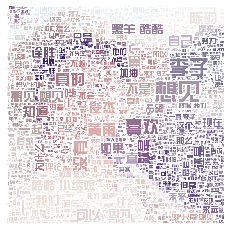

In [16]:
plt.imshow(my_wordcloud.recolor(color_func=image_colors))  #红色星
plt.rcParams['font.sans-serif'] = ['SimHei']              # 两行解决乱码！！！
plt.rcParams['axes.unicode_minus'] = False                # 两行解决乱码！！！
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
